<a href="https://colab.research.google.com/github/FabioRovai/RAFT/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [36]:
!wget https://www.dropbox.com/s/74o2439vl4f705d/internet_freedom_scores.csv --quiet

import gdown



url = 'https://drive.google.com/u/0/uc?export=download&confirm=uAxG&id=1pw3S6t8bkSk0__RxCPfGSWwhsZuC9FDy'
output = 'notices.json'
gdown.download(url, output, quiet=True)

url = 'https://drive.google.com/u/0/uc?id=10H32wf70nBFdwlqKvU_7my3BBPc8LDuv&export=download'
output = 'csv.csv'
gdown.download(url, output, quiet=False)

url = 'https://drive.google.com/u/0/uc?export=download&confirm=zN00&id=1yNIJLQWw6ZdQPrCYVFj-2P-i996L7CEj'
output = 'rtf.csv'
gdown.download(url, output, quiet=True)

Downloading...
From: https://drive.google.com/u/0/uc?id=10H32wf70nBFdwlqKvU_7my3BBPc8LDuv&export=download
To: /content/csv.csv
100%|██████████| 54.6M/54.6M [00:00<00:00, 150MB/s]


'rtf.csv'

In [30]:
df=pd.read_csv('/content/clean_notices.csv')


In [37]:
df1=pd.read_csv('/content/internet_freedom_scores.csv')

In [41]:
import json

path = "/content/notices.json"

f = open(path ,encoding="utf8")

data = json.loads(f.read())


In [42]:

df3=pd.json_normalize(data)

In [47]:
df.head()

,Unnamed: 0,ID,Country,Cluster,Notice_Send_Dates,Action_Taken,Sender_name,Recipient_name,Notices,Total Score,Status,Obstacles to Access,Limits on Content,Violation of User Rights
0,0,11214903,Zimbabwe,1,2015-09-08 00:00:00+00:00,Yes,Federal Service for Supervision of Communicati...,"Twitter, Inc.","['information', 'page', 'link', 'russian', 'ne...",46.0,Partly Free,8.0,22.0,16.0
1,1,11348794,Turkey,9,2015-10-22 00:00:00+00:00,Yes,"APU's Similar Content Decision 2015-818, 2015...","Twitter, Inc.",NaN,34.0,Not Free,15.0,10.0,9.0
2,2,11427487,Zimbabwe,1,2015-09-11 00:00:00+00:00,NII,ROZKOMNADZOR,"Google, Inc.","['information', 'russian', 'distribution', 'pa...",46.0,Partly Free,8.0,22.0,16.0
3,3,11430294,Zimbabwe,1,2015-09-16 10:09:00+00:00,NII,ROSKOMNADZOR - Federal Service for Supervision...,"Google, Inc.","['information', 'russian', 'distribution', 'pa...",46.0,Partly Free,8.0,22.0,16.0
4,4,11451129,NaN,1,2015-10-14 10:25:00+00:00,NII,ROSKOMNADZOR - Federal Service for Supervision...,"Google, Inc.","['information', 'russian', 'distribution', 'pa...",NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.head()

In [ ]:
df3.head()

In [13]:
!pip install umap-learn --q

     |████████████████████████████████| 80 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 12.0 MB/s 


In [74]:
df=pd.read_csv('/content/clean_notices.csv')

df=df.replace("Russia", 0)
df=df.replace("Zimbabwe", 1)
df=df.replace("India", 2)
df=df.replace("Turkey", 3)
df=df.replace("France", 4)
df=df.replace("Korea, Republic of", 5)

df=df.replace("United States", 6)
df=df.replace("Pakistan", 7)
df=df.replace("Italy", 8)
df=df.replace("Spain", 9)
df=df.replace("Hong Kong", 10)
df=df.replace("Israel", 11)

df=df.replace("Taiwan, Province of China", 12)
df=df.replace("United Kingdom", 13)
df=df.replace("Germany", 14)
df=df.replace("Brazil", 15)
df=df.replace("International", 16)
df=df.replace("Azerbaijan", 17)

df=df.replace("Singapore", 18)
df=df.replace("Mexico", 19)
df=df.replace("Denmark", 20)
df=df.replace("Austria", 21)
df=df.replace("Kazakhstan", 22)
df=df.replace("Indonesia", 23)
df=df.replace("North Macedonia", 24)


df=df.replace("Not Free", 0)
df=df.replace("Partly Free", 1)
df=df.replace("Free", 2)

df=df.replace("NII", 0)
df=df.replace("Yes", 1)
df=df.replace("Partial", 2)
df=df.replace("Unspecified", 3)
df=df.replace("No", 4)
df['Sender_name'].value_counts()


56121

In [17]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as UMAP

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4f7159e10>,
      dtype=object)

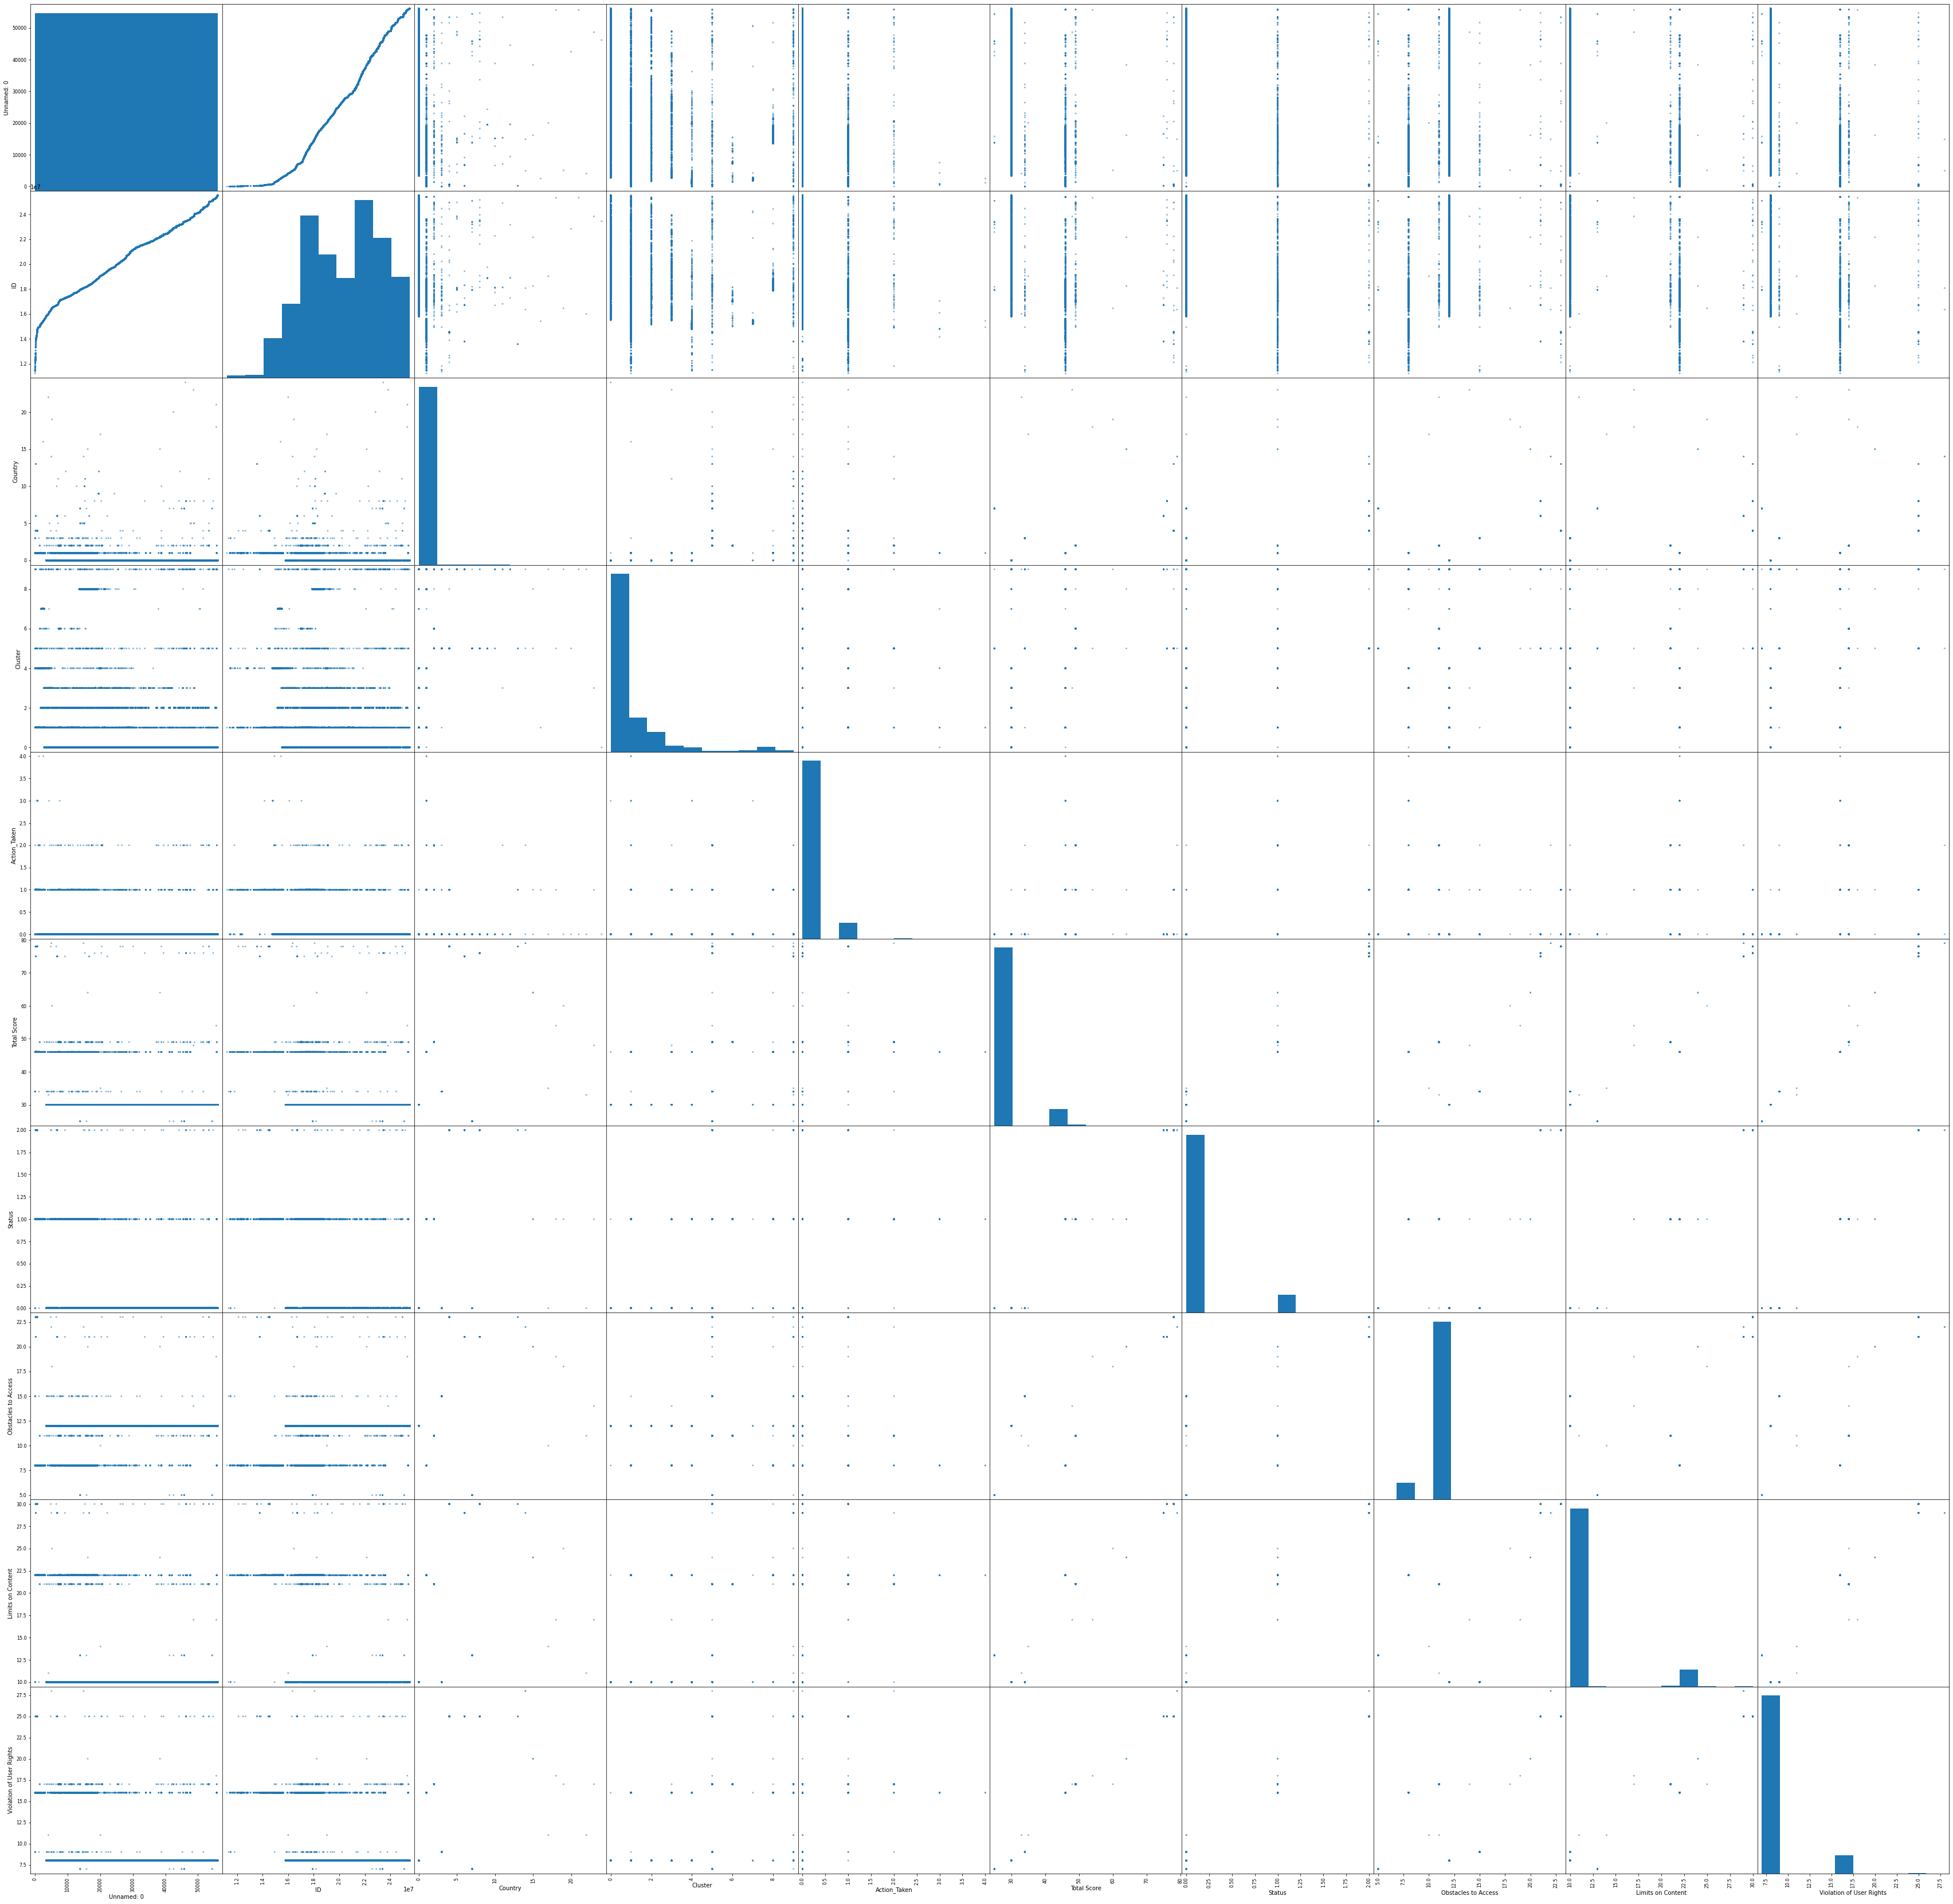

In [75]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(60,60))

In [76]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Unnamed: 0,ID,Country,Cluster,Action_Taken,Total Score,Status,Obstacles to Access,Limits on Content,Violation of User Rights
Unnamed: 0,1.00,0.99,-0.23,-0.32,-0.31,-0.36,-0.37,0.34,-0.38,-0.37
ID,0.99,1.00,-0.24,-0.33,-0.34,-0.39,-0.40,0.36,-0.41,-0.40
Country,-0.23,-0.24,1.00,0.46,0.53,0.79,0.75,-0.42,0.73,0.76
Cluster,-0.32,-0.33,0.46,1.00,0.41,0.54,0.53,-0.40,0.53,0.54
Action_Taken,-0.31,-0.34,0.53,0.41,1.00,0.89,0.92,-0.87,0.93,0.92
Total Score,-0.36,-0.39,0.79,0.54,0.89,1.00,0.99,-0.75,0.99,1.00
Status,-0.37,-0.40,0.75,0.53,0.92,0.99,1.00,-0.82,1.00,1.00
Obstacles to Access,0.34,0.36,-0.42,-0.40,-0.87,-0.75,-0.82,1.00,-0.85,-0.81
Limits on Content,-0.38,-0.41,0.73,0.53,0.93,0.99,1.00,-0.85,1.00,1.00
Violation of User Rights,-0.37,-0.40,0.76,0.54,0.92,1.00,1.00,-0.81,1.00,1.00


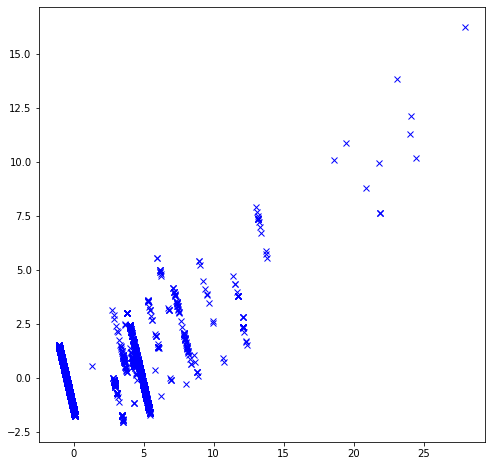

In [92]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



y = df[['ID','Country','Action_Taken','Total Score']].dropna()

x = StandardScaler().fit_transform(y)




pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [86]:

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3)
    plot_centroids(clusterer.cluster_centers_)

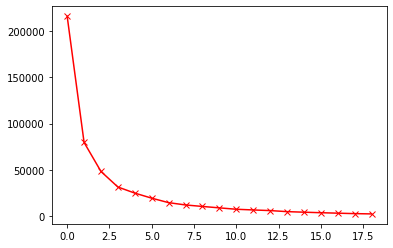

In [93]:
from sklearn.cluster import KMeans
scores=[]
for i in range(1,20):
    #Fit for k
    means=KMeans(n_clusters=i)
    means.fit(x)
    #Get inertia
    scores.append(means.inertia_)
plt.plot(scores,"-rx")

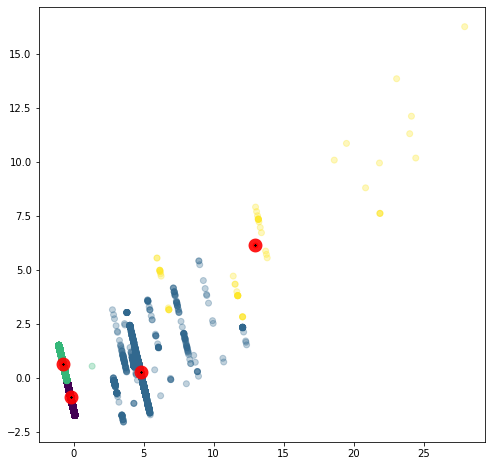

In [94]:
#How many dimensions to reduce to (before clustering)?
num_dimensions = 3

#Reduce dimensions
pca = PCA(n_components=num_dimensions)
x_less_dimensions = pca.fit_transform(x)

#Fit cluster
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_less_dimensions)

#Plot results on 2D plot
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_less_dimensions)